In [1]:
import pandas as pd


In [2]:
#Carga de datos
df = pd.read_csv('defweb20.csv',  sep=';')

In [3]:
# Filtrar solo defunciones con causa X70 (suicidio)
suicidio_df = df[df["CAUSA"] == "X70"]

# Ver provincias (valores únicos de la columna PROVRES)
provincias_neumonia = suicidio_df["PROVRES"].unique()

print("Provincias con defunciones por suicidio (X70):")
print(provincias_neumonia)

conteo_provincias = suicidio_df["PROVRES"].value_counts()

print("Número de registros de defunciones por suicidio por provincia:")
print(conteo_provincias)

Provincias con defunciones por suicidio (X70):
[ 2  6 10 14 18 22 26 30 34 38 42 46 50 54 58 62 66 70 74 78 82 86 90 94
 99]
Número de registros de defunciones por suicidio por provincia:
PROVRES
6     40
50    26
14    25
82    25
90    25
38    24
66    24
54    24
30    23
86    23
22    20
18    20
34    19
10    19
62    19
74    17
70    17
46    16
58    15
78    15
26    14
42    14
94     8
99     7
2      5
Name: count, dtype: int64


In [9]:
import pandas as pd

# Filtrar suicidios
suicidio_df = df[df["CAUSA"] == "X70"]
conteo_provincias = suicidio_df["PROVRES"].value_counts()

# Población por provincia
poblacion = {
    2: 3075646, 6: 17541141, 10: 367828, 14: 3900000, 18: 1213242, 22: 1143201,
    26: 603120, 30: 1385965, 34: 606041, 38: 797955, 42: 366022, 46: 384607,
    50: 2062846, 54: 1237340, 58: 726590, 62: 762067, 66: 1333365, 70: 818234,
    74: 540905, 78: 337226, 82: 3397532, 86: 1060906, 90: 1694656, 94: 190641,
    98: None, 99: None
}

# Nombres de provincias
codigos_provincias = {
    2: "Ciudad Autónoma de Buenos Aires", 6: "Buenos Aires", 10: "Catamarca",
    14: "Córdoba", 18: "Corrientes", 22: "Chaco", 26: "Chubut", 30: "Entre Ríos",
    34: "Formosa", 38: "Jujuy", 42: "La Pampa", 46: "La Rioja", 50: "Mendoza",
    54: "Misiones", 58: "Neuquén", 62: "Río Negro", 66: "Salta", 70: "San Juan",
    74: "San Luis", 78: "Santa Cruz", 82: "Santa Fe", 86: "Santiago del Estero",
    90: "Tucumán", 94: "Tierra del Fuego", 98: "Sin especificar", 99: "Exterior"
}

# Crear DataFrame
df_resultado = conteo_provincias.rename("suicidios").reset_index()
df_resultado.columns = ["PROVRES", "suicidios"]
df_resultado["provincia"] = df_resultado["PROVRES"].map(codigos_provincias)
df_resultado["poblacion"] = df_resultado["PROVRES"].map(poblacion)
df_resultado["tasa_por_100k"] = (df_resultado["suicidios"] / df_resultado["poblacion"]) * 100000
df_resultado = df_resultado.round({"tasa_por_100k": 2})
df_ordenado = df_resultado.sort_values("tasa_por_100k", ascending=False)

print("Tasa de suicidios por cada 100.000 habitantes por provincia:")
print(df_ordenado[["provincia", "suicidios", "poblacion", "tasa_por_100k"]])

Tasa de suicidios por cada 100.000 habitantes por provincia:
                          provincia  suicidios   poblacion  tasa_por_100k
13                        Catamarca         19    367828.0           5.17
19                       Santa Cruz         15    337226.0           4.45
22                 Tierra del Fuego          8    190641.0           4.20
17                         La Rioja         16    384607.0           4.16
21                         La Pampa         14    366022.0           3.82
12                          Formosa         19    606041.0           3.14
15                         San Luis         17    540905.0           3.14
5                             Jujuy         24    797955.0           3.01
14                        Río Negro         19    762067.0           2.49
20                           Chubut         14    603120.0           2.32
9               Santiago del Estero         23   1060906.0           2.17
16                         San Juan         17    8

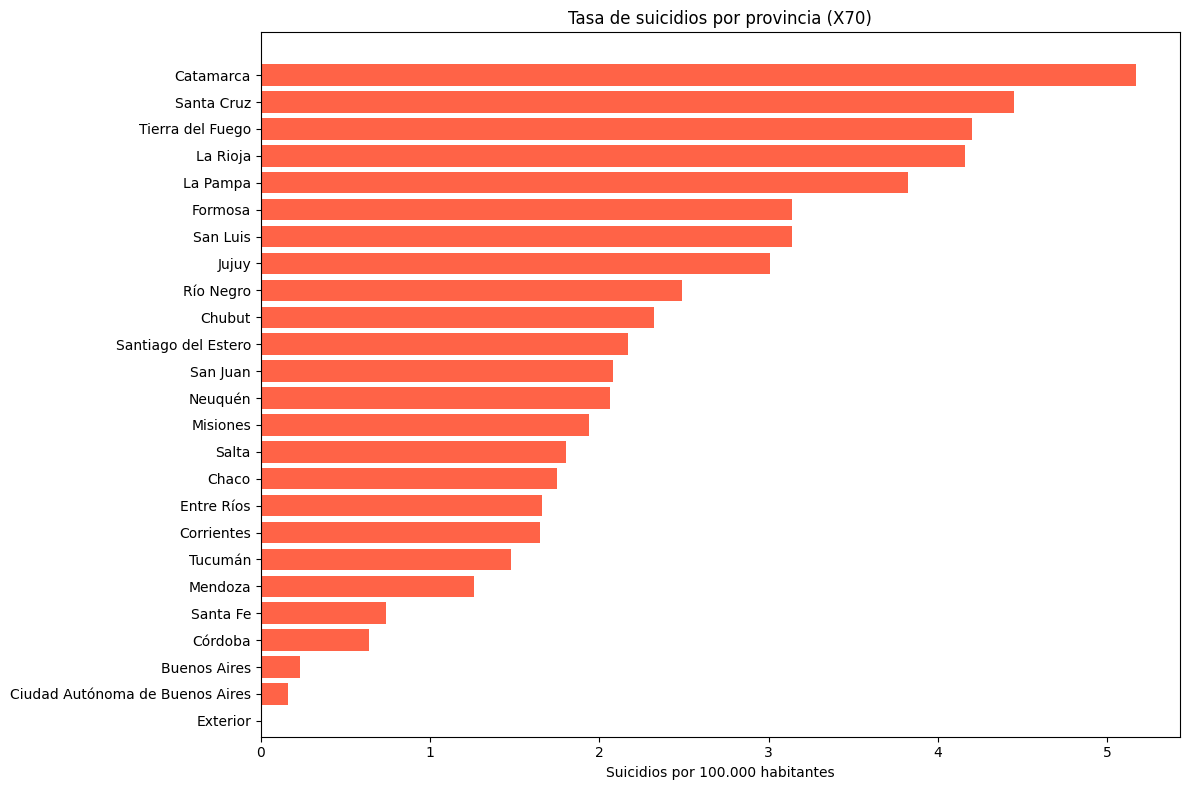

In [10]:
import matplotlib.pyplot as plt

# Este script supone que df_ordenado ya fue creado
plt.figure(figsize=(12, 8))
plt.barh(df_ordenado["provincia"], df_ordenado["tasa_por_100k"], color="tomato")
plt.xlabel("Suicidios por 100.000 habitantes")
plt.title("Tasa de suicidios por provincia (X70)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()